In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

flights = pd.read_csv(
    'C:/Users/Olga/Downloads/Skill Factory_files/Module 4/Module_4_sql_data', sep=',')

display(flights.head(10))
flights.info()

# функция первичного анализа столбца через показатели и гистограмму
def column_analisys(clmn):
    print(clmn.describe())
    clmn.hist()
    IQR = clmn.quantile(0.75) - clmn.quantile(0.25)
    perc25 = clmn.quantile(0.25)
    perc75 = clmn.quantile(0.75)

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    clmn.loc[clmn.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
             ].hist(bins=10, range=(clmn.min(), clmn.max()), label='IQR')

    plt.legend()
    return


def IQR_left(clmn):  # функция подсчета диапазона без выбросов
    IQR = clmn.quantile(0.75) - clmn.quantile(0.25)
    perc25 = clmn.quantile(0.25)

    range_low = perc25 - 1.5*IQR

    return range_low


def IQR_right(clmn):  # функция подсчета диапазона без выбросов
    IQR = clmn.quantile(0.75) - clmn.quantile(0.25)

    perc75 = clmn.quantile(0.75)

    range_up = perc75 + 1.5*IQR
    return range_up


def nom_unique(clmn):
    print('Уникальных значений:', clmn.nunique()-1)
    plt.plot(clmn)
    display(clmn.value_counts())
    return


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,aircraft_code,model,flight_sum,flight_distance,flight_time,flight_cost,profit
0,136119,PG0252,2017-01-03 13:05:00,2017-01-03 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1653000.00,758.065817,1.666667,215462.0,1437538.0
1,136120,PG0252,2017-02-24 13:05:00,2017-02-24 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1605400.00,758.065817,1.666667,215462.0,1389938.0
2,136122,PG0252,2017-01-08 13:05:00,2017-01-08 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1431000.00,758.065817,1.666667,215462.0,1215538.0
3,136130,PG0252,2017-02-13 13:05:00,2017-02-13 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1556600.00,758.065817,1.666667,215462.0,1341138.0
4,136131,PG0252,2017-01-28 13:05:00,2017-01-28 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1812800.00,758.065817,1.666667,215462.0,1597338.0
5,136132,PG0252,2017-02-15 13:05:00,2017-02-15 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1714000.00,758.065817,1.666667,215462.0,1498538.0
6,136135,PG0252,2017-02-01 13:05:00,2017-02-01 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1678600.00,758.065817,1.666667,215462.0,1463138.0
7,136146,PG0252,2017-02-09 13:05:00,2017-02-09 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1604200.00,758.065817,1.666667,215462.0,1388738.0
8,136159,PG0252,2017-01-04 13:05:00,2017-01-04 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1700600.00,758.065817,1.666667,215462.0,1485138.0
9,136164,PG0252,2017-01-07 13:05:00,2017-01-07 14:45:00,AAQ,Anapa,SVO,Moscow,733,Boeing 737-300,1738400.00,758.065817,1.666667,215462.0,1522938.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   flight_no            127 non-null    object 
 2   scheduled_departure  127 non-null    object 
 3   scheduled_arrival    127 non-null    object 
 4   departure_airport    127 non-null    object 
 5   departure_city       127 non-null    object 
 6   arrival_airport      127 non-null    object 
 7   arrival_city         127 non-null    object 
 8   aircraft_code        127 non-null    object 
 9   model                127 non-null    object 
 10  flight_sum           127 non-null    object 
 11  flight_distance      127 non-null    float64
 12  flight_time          127 non-null    float64
 13  flight_cost          127 non-null    float64
 14  profit               127 non-null    float64
dtypes: float64(4), int64(1), object(10)
memo

Общая стоимость билетов - анализ

In [28]:
flights.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'departure_city', 'arrival_airport',
       'arrival_city', 'aircraft_code', 'model', 'flight_sum',
       'flight_distance', 'flight_time', 'flight_cost', 'profit'],
      dtype='object')

# Arrival_city - анализ

3 -Всего городов назначения


,arrival_city
Moscow,59
Belgorod,59
Novokuznetsk,9


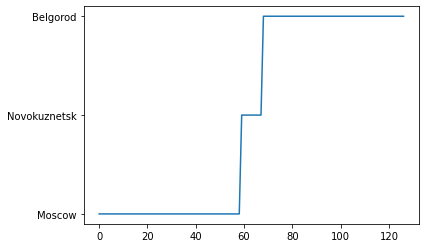

In [37]:
print(flights.arrival_city.nunique(),'-Всего городов назначения')
plt.plot(flights.arrival_city)
pd.DataFrame(flights.arrival_city.value_counts())

# Flight_cost  - анализ

count       127.000000
mean     182547.602047
std      147615.401641
min       77234.840000
25%       77234.840000
50%      215462.000000
75%      215462.000000
max      657159.100000
Name: flight_cost, dtype: float64
25-й перцентиль: 77234.84000000001, 75-й перцентиль: 215462.0, IQR: 138227.15999999997,  Границы выбросов: [-130105.89999999995, 422802.74].


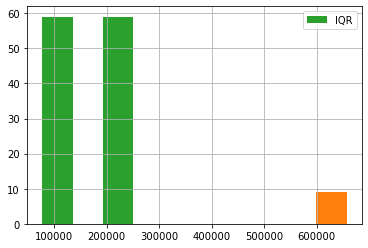

In [30]:
flights.flight_cost.hist()
column_analisys(flights.flight_cost)

In [31]:
flights.flight_cost.loc[flights.flight_cost > 422802.74]

59    657159.1
60    657159.1
61    657159.1
62    657159.1
63    657159.1
64    657159.1
65    657159.1
66    657159.1
67    657159.1
Name: flight_cost, dtype: float64

# profit  - анализ

count    1.270000e+02
mean     9.105839e+05
std      5.886590e+05
min     -6.571591e+05
25%      6.373652e+05
50%      6.880652e+05
75%      1.394838e+06
max      1.670538e+06
Name: profit, dtype: float64
25-й перцентиль: 637365.16, 75-й перцентиль: 1394838.0, IQR: 757472.84,  Границы выбросов: [-498844.1, 2531047.26].


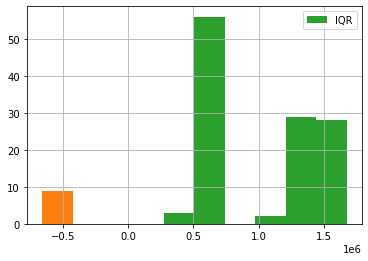

In [32]:
flights.profit.hist()
column_analisys(flights.profit)

In [33]:
flights.profit.loc[flights.profit < -498844.1]

59   -657159.1
60   -657159.1
61   -657159.1
62   -657159.1
63   -657159.1
64   -657159.1
65   -657159.1
66   -657159.1
67   -657159.1
Name: profit, dtype: float64

# Корреляционный анализ



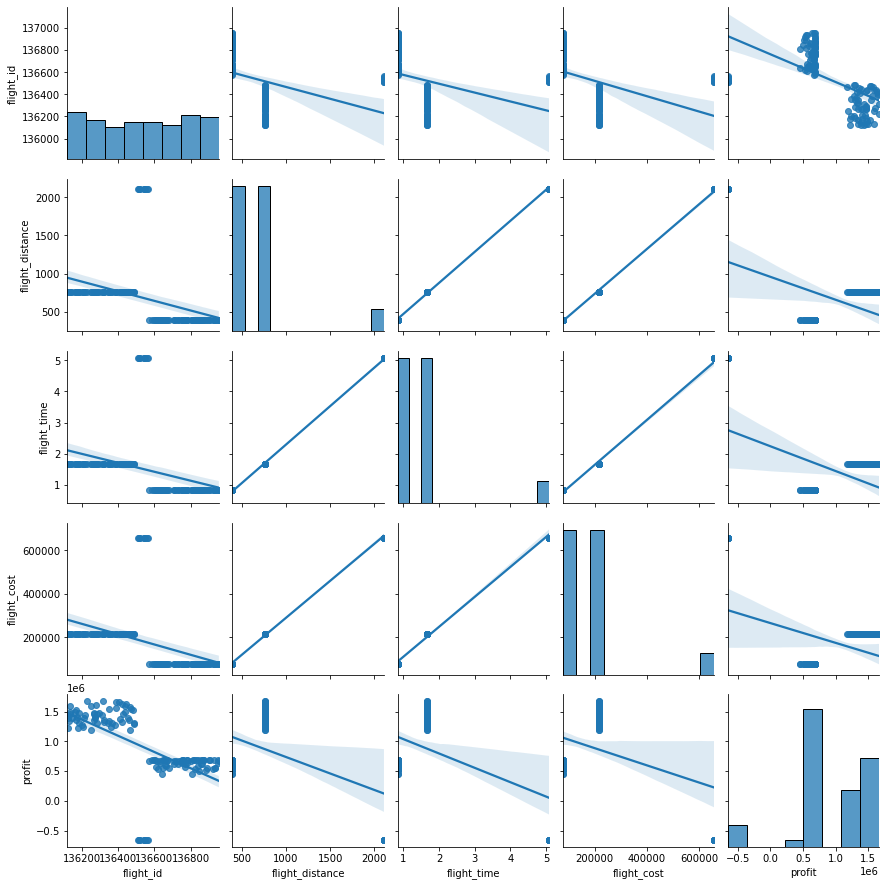

In [38]:
sns.pairplot(flights, kind='reg')

In [39]:
flights.corr()

,flight_id,flight_distance,flight_time,flight_cost,profit
flight_id,1.000000,-0.366496,-0.338360,-0.405983,-0.584062
flight_distance,-0.366496,1.000000,0.999423,0.998820,-0.406683
flight_time,-0.338360,0.999423,1.000000,0.996592,-0.436950
flight_cost,-0.405983,0.998820,0.996592,1.000000,-0.362601
profit,-0.584062,-0.406683,-0.436950,-0.362601,1.000000


# Анализ номинативных переменных

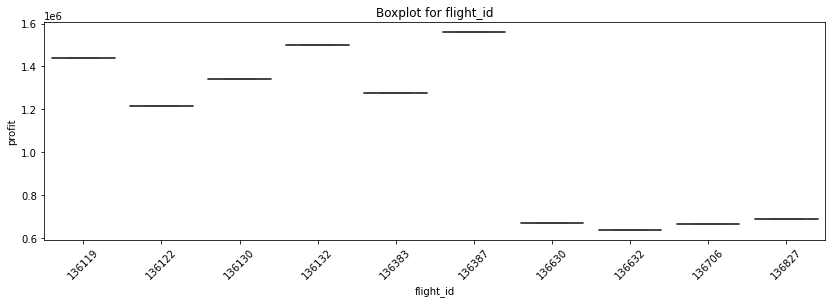

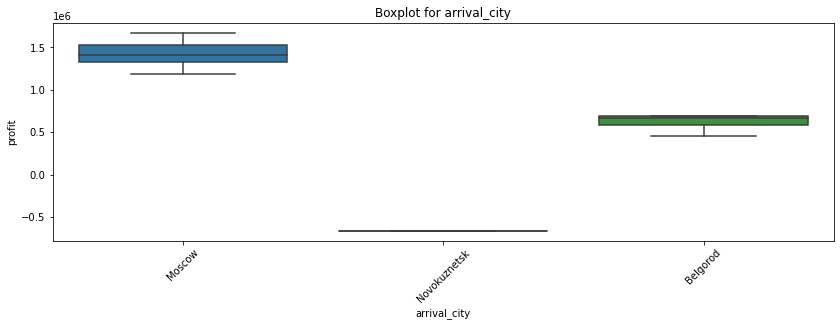

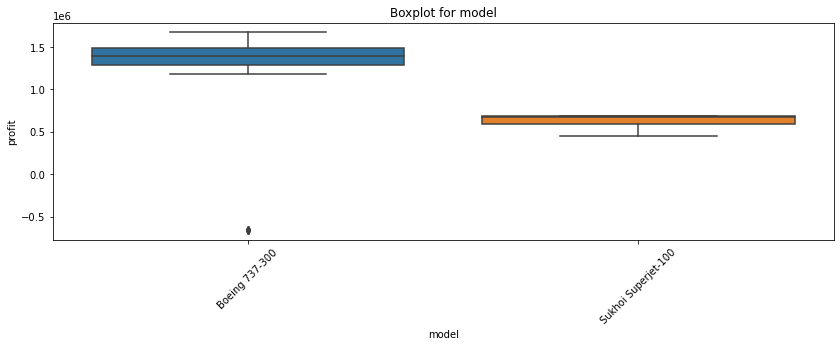

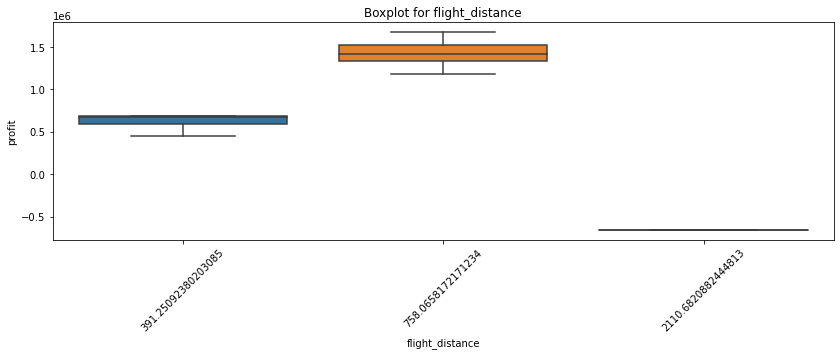

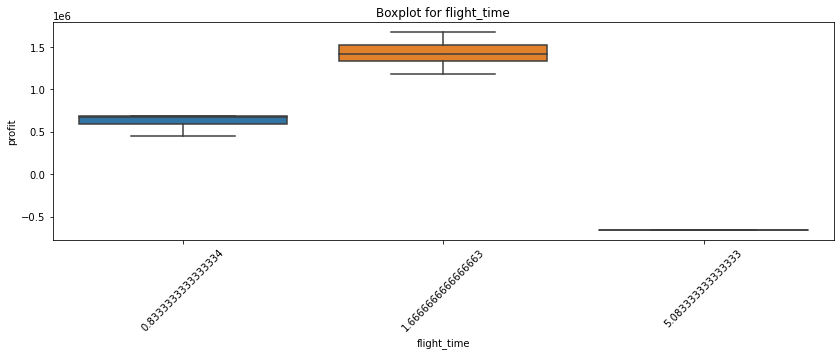

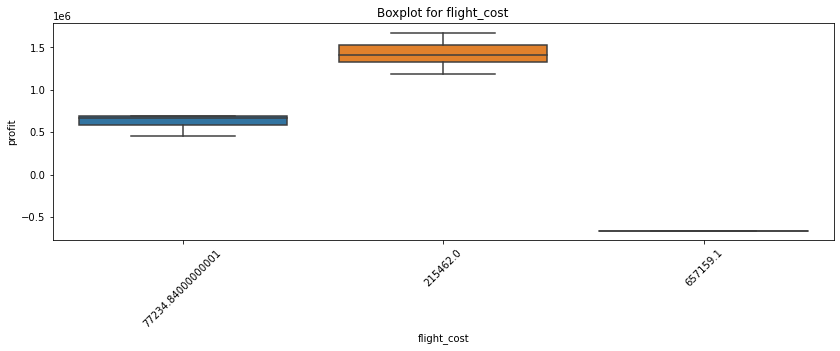

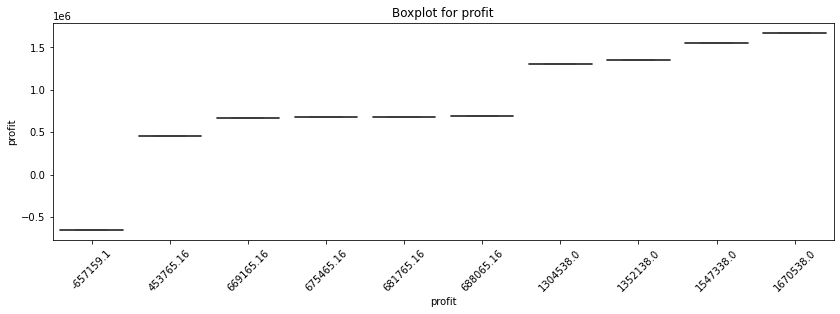

In [41]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='profit',
                data=flights.loc[flights.loc[:, column].isin(
                    flights.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['flight_id','arrival_city',  'model','flight_distance', 'flight_time', 'flight_cost', 'profit']:
    get_boxplot(col)

# Невыгодные рейсы

In [46]:
display(flights[flights.profit < -498844.1])

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,aircraft_code,model,flight_sum,flight_distance,flight_time,flight_cost,profit
59,136511,PG0194,2017-02-21 09:10:00,2017-02-21 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
60,136513,PG0194,2017-02-28 09:10:00,2017-02-28 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
61,136514,PG0194,2017-02-07 09:10:00,2017-02-07 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
62,136523,PG0194,2017-01-10 09:10:00,2017-01-10 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
63,136540,PG0194,2017-01-17 09:10:00,2017-01-17 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
64,136544,PG0194,2017-01-31 09:10:00,2017-01-31 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
65,136546,PG0194,2017-01-03 09:10:00,2017-01-03 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
66,136560,PG0194,2017-01-24 09:10:00,2017-01-24 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
67,136567,PG0194,2017-02-14 09:10:00,2017-02-14 14:15:00,AAQ,Anapa,NOZ,Novokuznetsk,733,Boeing 737-300,(null),2110.682088,5.083333,657159.1,-657159.1
